Proje 1: Kaggle Hasta Tahlil Veri Seti Kullanarak Şeker Hastalığını Tahmin Etme

KNN- K Nearest Neighbours Modeli kullanıldı

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome=1 Diabet/Şeker hastalığı
# Outcome=0 Sağlıklı
data=pd.read_csv("diabetes.csv")
# Veriyi inceleyelim
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


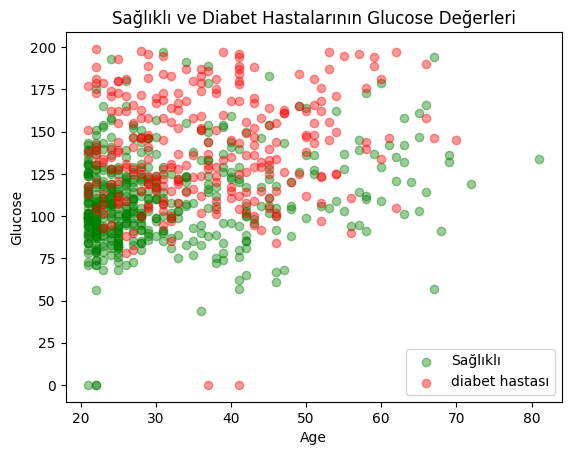

In [10]:
seker_hastalari = data[data['Outcome'] == 1]
saglikli_insanlar = data[data['Outcome'] == 0]

#Şimdilik sadece glucose'a bakarak örnek bir çizim yapalım:
#programımızın sonunda makine öğrenme modelimizin sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age , saglikli_insanlar.Glucose, color='green', label='Sağlıklı', alpha=0.4)
plt.scatter(seker_hastalari.Age , seker_hastalari.Glucose, color='red', label='diabet hastası', alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Sağlıklı ve Diabet Hastalarının Glucose Değerleri")
plt.legend()
plt.show()

In [11]:
#x ve y eksenlerni belirleyelim
y=data.Outcome.values
x_ham_veri=data.drop(['Outcome'],axis=1)
#Outcome sütununu (dependent variable) çıkarıp sadece independent variables bırakıyoruz
#Çünkü KNN algoritması x değerleri içerisinde gruplandırma yapacak

#normalization yapıyoruz - x_ham_veri içerisindeki değerleri 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
#eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritması
x=(x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

#önce 
print("Normalization öncesi ham veriler: \n")
print(x_ham_veri.head())

#sonra
print("\n\n\n Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalization öncesi ham veriler: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



 Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456

In [28]:
#train datamız ve test datamızı ayırıyoruz
#train datamız sistemi sağlıklı insan ile hasta insanı ayırt etmsini öğrenmek için kullanılılacak
#test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyormu diye
#test etmek için kullanılacak...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

#knn modelimizi oluşturuyoruz.
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbors=k
knn.fit(x_train, y_train) 
prediction=knn.predict(x_test)
print("K=3 için Test verilerimizin doğrulama test sonucu ",knn.score(x_test,y_test))


K=3 için Test verilerimizin doğrulama test sonucu  0.7792207792207793


In [29]:

#k kaç olmalı?
#en iyi k değerini belirleyelim..
sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train, y_train)
    print(sayac,"  ","Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1    Doğruluk oranı: % 79.22077922077922
2    Doğruluk oranı: % 74.02597402597402
3    Doğruluk oranı: % 77.92207792207793
4    Doğruluk oranı: % 74.02597402597402
5    Doğruluk oranı: % 72.72727272727273
6    Doğruluk oranı: % 75.32467532467533
7    Doğruluk oranı: % 74.02597402597402
8    Doğruluk oranı: % 76.62337662337663
9    Doğruluk oranı: % 76.62337662337663
10    Doğruluk oranı: % 76.62337662337663


In [ ]:
#Yeni hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

#normalization yapıyoruz - daha hızlı yapabilmek için MinMax scaer kullandık...
sc=MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction=knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\Ayşe Paycı\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Ayşe Paycı\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0